In [ ]:
# Import packages
# http://intelligence.korea.ac.kr/members/wschoi/seminar/tutorial/mnist/pytorch/gan/GAN-%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("사용하는 Device : ", DEVICE)

EPOCHS = 400
BATCH_SIZE = 200

사용하는 Device :  cuda


In [ ]:
# code for MNIST dataset loading error at Google Colab.
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
# Transformer code
transformer = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
])


# Loading trainset, testset and trainloader, testloader
trainset = torchvision.datasets.MNIST(root = '/content/drive/MyDrive/MNIST', train = True,
                                        download = True, transform = transformer)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)


testset = torchvision.datasets.MNIST(root = '/content/drive/MyDrive/MNIST', train = False,
                                        download = True, transform = transformer)

testloader = torch.utils.data.DataLoader(testset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)

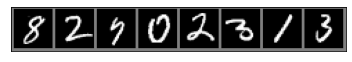

In [ ]:
# sample check
sample, label = next(iter(trainloader))

# show grid image
def imshow_grid(img):
    img = torchvision.utils.make_grid(img.cpu().detach())
    img = (img + 1) / 2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()


imshow_grid(sample[0:8])

In [ ]:
# Discriminator class
class Dis_model(nn.Module):
    def __init__(self, image_size, hidden_space):
        super(Dis_model, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(image_size, hidden_space),
            nn.ReLU(),
            nn.Linear(hidden_space, hidden_space),
            nn.ReLU(),
            nn.Linear(hidden_space, 1),
            nn.Sigmoid())
    
    def forward(self, input_x):
        x = self.features(input_x)
        return x

In [ ]:
# Generator class
class Gen_model(nn.Module):
    def __init__(self, latent_space, hidden_space, image_size):
        super(Gen_model, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(latent_space, hidden_space),
            nn.ReLU(),
            nn.Linear(hidden_space, hidden_space),
            nn.ReLU(),
            nn.Linear(hidden_space, image_size),
            nn.Tanh())
        
    def forward(self, input_x):
        x = self.features(input_x)
        return x

In [ ]:
im_size = 784
hidden_size = 256
latent_size = 100

Dis_net = Dis_model(image_size = im_size, hidden_space = hidden_size).to(DEVICE)
Gen_net = Gen_model(image_size = im_size, hidden_space = hidden_size, latent_space = latent_size).to(DEVICE)

d_optimizer = optim.Adam(Dis_net.parameters(), lr = 0.0002)
g_optimizer = optim.Adam(Gen_net.parameters(), lr = 0.0002)

In [ ]:
# Start training
def train(generator, discriminator, train_loader, optimizer_d, optimizer_g):

    # Train version
    generator.train()
    discriminator.train()

    for data, target in train_loader:

        data, target = data.to(DEVICE), target.to(DEVICE)

        # ==========================================#
        # ==========Optimize discriminator==========#
        # ==========================================#

        # initialize discriminator optimizer
        optimizer_d.zero_grad()

        # Make noise samples for discriminator update
        noise_samples_d = torch.randn(BATCH_SIZE, latent_size).to(DEVICE)

        # real loss
        discri_value = discriminator(data.view(-1, 28*28))
        loss_real = -1 * torch.log(discri_value) # gradient ascent

        # fake loss
        gene_value = discriminator(generator(noise_samples_d))
        loss_fake = -1 * torch.log(1.0 - gene_value) # gradient ascent

        # Final loss
        loss_d = (loss_real + loss_fake).mean()

        loss_d.backward()
        optimizer_d.step()


        # ========================================= #
        # ==========Optimize generator============= #
        # ========================================= #

        # initialize generator optimizer
        optimizer_g.zero_grad()

        # Make noise samples for generator update
        noise_samples_g = torch.randn(BATCH_SIZE, latent_size).to(DEVICE)

        # calculate loss
        fake_value = discriminator(generator(noise_samples_g))
        loss_generator = -1 * torch.log(fake_value).mean() # provide much stronger gradients early in learning.
        
        loss_generator.backward()
        optimizer_g.step()

epoch 20 / 400


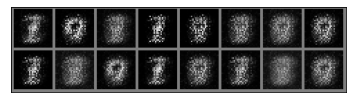



epoch 40 / 400


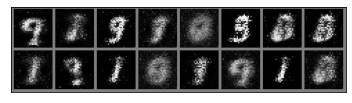



epoch 60 / 400


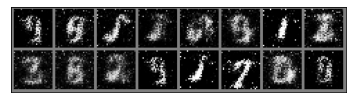



epoch 80 / 400


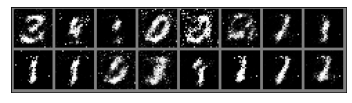



epoch 100 / 400


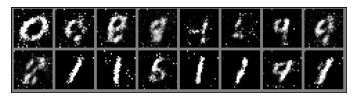



epoch 120 / 400


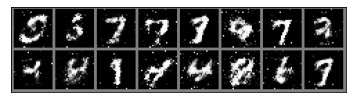



epoch 140 / 400


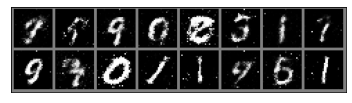



epoch 160 / 400


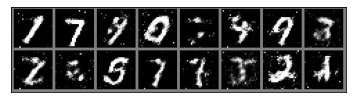



epoch 180 / 400


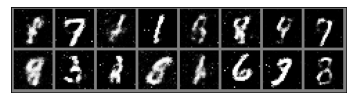



epoch 200 / 400


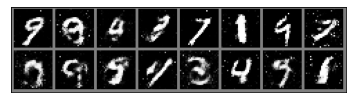



epoch 220 / 400


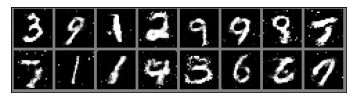



epoch 240 / 400


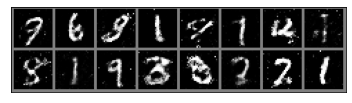



epoch 260 / 400


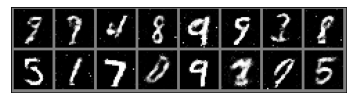



epoch 280 / 400


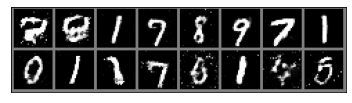



epoch 300 / 400


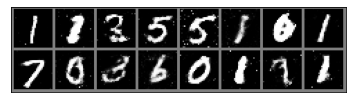



epoch 320 / 400


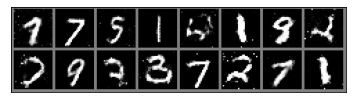



epoch 340 / 400


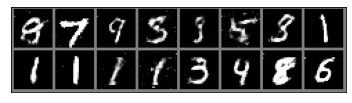



epoch 360 / 400


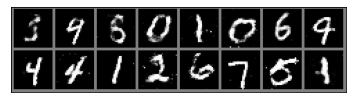



epoch 380 / 400


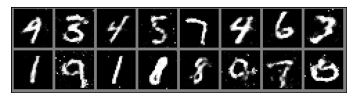



epoch 400 / 400


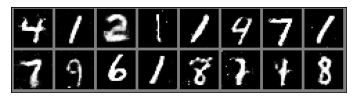

In [ ]:
for epoch in tqdm(range(EPOCHS)):
    train(Gen_net, Dis_net, trainloader, d_optimizer, g_optimizer)

    if (epoch+1)%20 == 0:
        print('epoch %i / 400' % (epoch+1))
        
        noise_sam = torch.randn(16, latent_size).to(DEVICE)
        imshow_grid(Gen_net(noise_sam).view(-1, 1, 28, 28))
        print("\n")


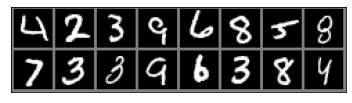

In [ ]:
# For test after training
vis_loader = torch.utils.data.DataLoader(testset, 16, True)
img_vis, label_vis = next(iter(vis_loader))
imshow_grid(img_vis)

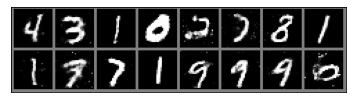

In [ ]:
# Make samples by using trained generator model.
sample_noise = torch.randn(16, latent_size).to(DEVICE)
imshow_grid(Gen_net(sample_noise).view(-1, 1, 28, 28))